In [3]:
import pandas as pd

df = pd.read_csv("student-mat.csv", sep=';')
df.head()



,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
df['pass'] = (df['G3'] >= 10).astype(int)
df['pass'].value_counts()


,count
pass,
1,265
0,130


In [5]:
df.groupby('pass')['absences'].mean()


,absences
pass,
0,6.761538
1,5.192453


In [6]:
df.groupby('pass')['studytime'].mean()

,studytime
pass,
0,1.946154
1,2.079245


In [7]:
df.groupby('pass')[['G1', 'G2']].mean()


,G1,G2
pass,,
0,7.761538,6.823077
1,12.452830,12.622642


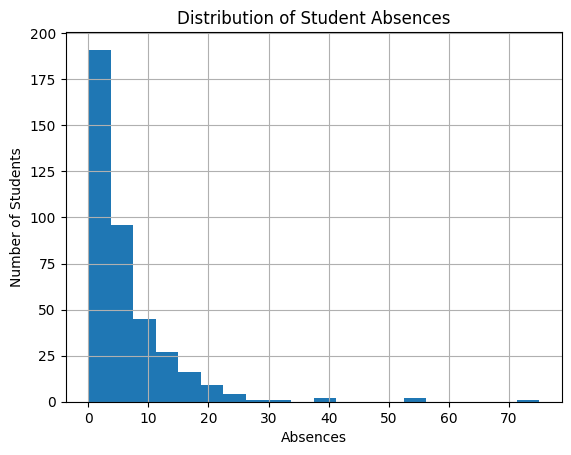

In [8]:
import matplotlib.pyplot as plt

df['absences'].hist(bins=20)
plt.xlabel("Absences")
plt.ylabel("Number of Students")
plt.title("Distribution of Student Absences")
plt.show()


Students who failed had noticeably higher average absences compared to students who passed, indicating attendance is a strong risk factor for failure.

In [10]:
X = df[['absences', 'studytime', 'G1', 'G2']]
y = df['pass']


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [13]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [14]:
y_pred = model.predict(X_test)


In [15]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)


array([[23,  3],
       [ 7, 46]])

In [16]:
from sklearn.metrics import recall_score

recall_score(y_test, y_pred)


0.8679245283018868

The model achieved an 87% recall, successfully identifying most at-risk students while keeping false alerts relatively low.

## Final Insights

1. Students with higher absences showed significantly higher failure risk.
2. Prior academic performance (G1, G2) was the strongest predictor of final outcomes.
3. The logistic regression model achieved 87% recall, making it effective for early risk detection.
